len: 2448
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[-15. -15. -15. -15. -15. -15. -15. -15. -15. -15.]
[41.919 41.239 41.479 41.716 41.921 41.649 41.208 40.865 40.39  40.841]


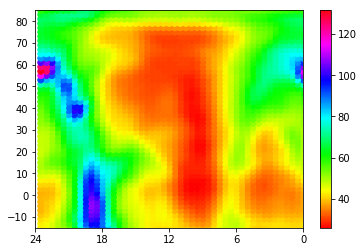

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fmhz = "25"
fmhz2 = "16.7"
freq = {"25":2,"20":3,"16.7":4,"14.7":5,"12":6}
n = 51*48 

ra  = np.ndarray(n,dtype=np.float32)  # list()  # 0
dec = np.ndarray(n,dtype=np.float32)  # list()  # 1
t =   np.ndarray(n,dtype=np.float32)  # list()
t2 =  np.ndarray(n,dtype=np.float32)  # list()

file_name = "data/s56ellips_SS5019_data09-04-2012.txt"

# file_name = "data/urans56ellips_SS5019_data09-04-2012_1.txt"

i = 0
with open(file_name) as f:
    
    for line in f:
        s = line.split()
        
        try:
            ra[i] = float(s[0])
            dec[i] = float(s[1])
            t[i] = float(s[freq[fmhz]])
            t2[i] = float(s[freq[fmhz2]])
            i += 1
        except (IndexError, ValueError):
            print(s)
    
print("len: {0}".format(len(t)))
print(ra[0:10])
print(dec[0:10])
print(t[0:10])

fig = plt.figure()
ax = plt.axes()

plt.xlim(24,0)
plt.ylim(-15,85)

# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_locator(plt.MultipleLocator(6))

# ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))

# https://matplotlib.org/tutorials/colors/colormaps.html
map_clr = ['gray','viridis','hsv']

plt.scatter(ra, dec,c=t,cmap=map_clr[2])  

plt.colorbar()

fig.savefig('tmp/exmpl.png')
plt.show()

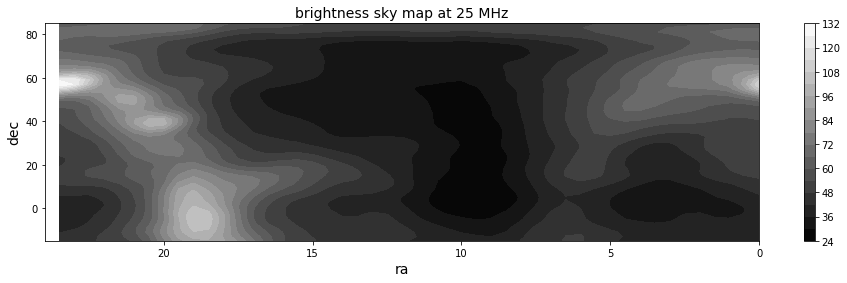

In [3]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
#import numpy as np

#def f(x, y):
     #return np.sin(x) ** 10 + np.cos(10 + y*x) * np.cos(x)
#    return x+y
#x = np.linspace(0, 5, 50)
#y = np.linspace(0, 5, 40)
#X, Y = np.meshgrid(ra, dec)
#Z = f(X,Y)
#plt.contour(X, Y, Z, colors='black')

x = ra.reshape((51,48))
y = dec.reshape((51,48))
z = t.reshape((51,48))

fig = plt.figure(figsize=(16,4))

plt.xlim(24,0)
plt.ylim(-15,85)

#plt.contour(z, colors='black')
#plt.contour(x, y, z, 20, colors='black')
plt.contourf(x, y, z, 20, cmap='gray')

#contours = plt.contour(x,y,z, 10, colors='black')
#plt.clabel(contours, inline=True, fontsize=8)
#plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='gray', alpha=0.5)


plt.colorbar()
plt.title('brightness sky map at {0} MHz'.format(fmhz),fontsize='14') #
plt.xlabel('ra',fontsize='14')
plt.ylabel('dec',fontsize='14');
fig.savefig('tmp_files/exmpl_contour.png')

plt.show()

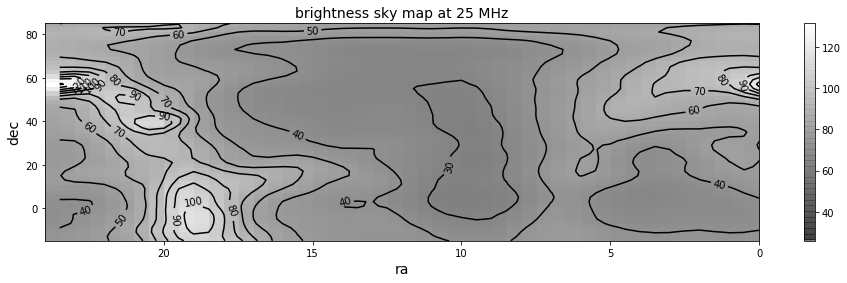

In [4]:
fig = plt.figure(figsize=(16,4))
plt.xlim(24,0)
plt.ylim(-15,85)

plt.rcParams["figure.figsize"] = 16,4

contours = plt.contour(x,y,z, 10, colors='black')
plt.clabel(contours, inline=True, fmt = '%1.0f', fontsize=10)

plt.imshow(z,extent=[0,24,85,-15],  aspect= 'auto',cmap='gray', alpha=0.5)

plt.axis(aspect='image')

plt.colorbar();
plt.title('brightness sky map at {0} MHz'.format(fmhz),fontsize='14') #
plt.xlabel('ra',fontsize='14')
plt.ylabel('dec',fontsize='14')

fig.savefig('tmp_files/exmpl_imshow.png')
plt.show()

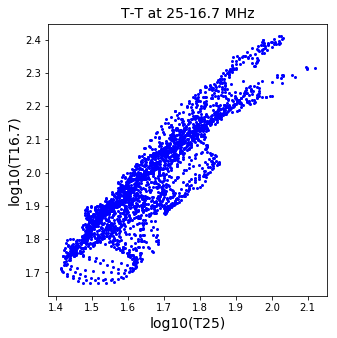

In [11]:
ig = plt.figure(figsize=(5,5))
ax = plt.axes()

#ax.xaxis.set_major_locator(plt.MaxNLocator(10))
#ax.xaxis.set_major_locator(plt.MultipleLocator(6))

#ax.yaxis.set_major_locator(plt.MaxNLocator(10))
#ax.yaxis.set_major_locator(plt.MultipleLocator(10))

plt.plot(np.log10(t), np.log10(t2),'ob', markersize=2)

#for i in range(len(t)):
#    if t[i]<40:
#        plt.plot(np.log10(t[i]), np.log10(t2[i]),'og', markersize=2)

        

plt.title('T-T at {0}-{1} MHz'.format(fmhz,fmhz2),fontsize='14') #


plt.xlabel('log10(T{0})'.format(fmhz),fontsize='14')
plt.ylabel('log10(T{0})'.format(fmhz2),fontsize='14')

plt.show()

In [16]:
type(z)

numpy.ndarray